In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [2]:
n = 4
t0 = 0
tfinal = 10
ATP = 1
ntrials = 5
K = [0.25,5]
gamma = 1
halfstep = 0.05

In [3]:
"""
define rate constants and the topology of the model; 4 state
"""
a01 = 3e0
a10 = 1e0
a12 = 5e3
a21 = 1e3
a20 = 7e0 #this is the base rate, we will alter this as a function of ATP later
"""
"""
#the order of reactions in the following 
#[[01],[10],[12],[21],[20],\ [03],[30],[34],[43],[40]]

v = np.array([[-1,1,0,0,0,0,0,0,0],[1,-1,0,0,0,0,0,0,0],[0,-1,1,0,0,0,0,0,0],[0,1,-1,0,0,0,0,0,0],[1,0,-1,0,0,0,0,0,0],\
              [-1,0,0,1,0,0,0,0,0],[1,0,0,-1,0,0,0,0,0],[0,0,0,-1,1,0,0,0,0],[0,0,0,1,-1,0,0,0,0],[1,0,0,0,-1,0,0,0,0],\
              [-1,0,0,0,0,1,0,0,0],[1,0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,1,0,0],[0,0,0,0,0,1,-1,0,0],[1,0,0,0,0,0,-1,0,0],\
             [-1,0,0,0,0,0,0,1,0],[1,0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1,1],[0,0,0,0,0,0,0,1,-1],[1,0,0,0,0,0,0,0,-1]])

a0 = np.array([a01,a10,a12,a21,a20,\
               a01,a10,a12,a21,a20,\
               a01,a10,a12,a21,a20,\
               a01,a10,a12,a21,a20])

In [4]:
def gillespie_step(x,a0,v):
    xocc = np.array([x[0],x[1],x[1],x[2],x[2],\
                     x[0],x[3],x[3],x[4],x[4],\
                    x[0],x[5],x[5],x[6],x[6],\
                    x[0],x[7],x[7],x[8],x[8]])
    #xocc[xocc != 0] = 1
    a = a0*xocc

    at = np.sum(a)

    r1 = np.random.rand()
    r2 = np.random.rand()

    tau = 1/at*np.log(1/r1)

    numel = np.size(a)
    thresh = at*r2
    for ii in range(numel):
        jj = ii + 1
        aj = np.sum(a[:jj])
        if aj < thresh:
            continue
        else:
            j = ii
            dx = v[j,:]
            break
    
    dt = tau
    return dx,dt,j

In [5]:
def is_xlked(tmp_state):
    #the total number of heads bound to filament 1
    fil1 = np.sum(tmp_state[1:5])
    fil2 = np.sum(tmp_state[5:])
    xlked = fil1*fil2
    
    if xlked > 0:
        val = True
    else:
        val = False
    
    return val

In [6]:
def get_xlk_ratio(state, time):
    
    fil_1_occ = np.sum(state[:,1:5],axis = 1)
    fil_2_occ = np.sum(state[:,5:],axis = 1)

    xlk = fil_1_occ*fil_2_occ
    
    ratio = np.count_nonzero(xlk)/np.size(xlk)
    
    return ratio
    

In [7]:
def get_traj(n,tfinal,ATP):
    
    count = 0
    """
    a00 = np.array([a01,a10,a12,a21,a20*ATP,\
                   a01*0,a10,a12,a21,a20*ATP,\
                   a01,a10,a12,a21,a20*ATP,\
                   a01*0,a10,a12,a21,a20*ATP])
    """
    a00 = np.array([a01,a10,a12,a21,a20*ATP,\
                   a01,a10,a12,a21,a20*ATP,\
                   a01,a10,a12,a21,a20*ATP,\
                   a01,a10,a12,a21,a20*ATP])
    a0 = a00
    s0 = [int(n),0,0,0,0,0,0,0,0]

    state = []
    time = []
    disp = []
    pos_x = []
    pos_y = []
    a_stor = []

    t = 0
    s = s0
    xt = [0,0]

    forward = [0,2]

    wb11 = []
    wb12 = []

    wb21 = []
    wb22 = []

    while t < tfinal:

        step = False
        #Gillespie step
        ds,dt,ind = gillespie_step(s,a0,v)

        #update state and time
        s = s + ds
        t = t + dt

        #if a head is binding to a filament, add its position to the storage array
        if ind == 0:
            wb11.append(xt[0]+halfstep)
        elif ind == 5:
            wb12.append(xt[0]+halfstep)
        elif ind == 10:
            wb21.append(xt[1]+halfstep)
        elif ind == 15:
            wb22.append(xt[1]+halfstep)

        """
        """
        #this is the full monty
        if forward[0] == 0:
            nforw_pps = s[2]
            nforw_wb = s[1]
            nbk = s[3] + s[4]
        else:
            nforw_pps = s[4]
            nforw_wb = s[3]
            nbk = s[1] + s[2]

        if (nbk == 0 and nforw_pps != 0):
            dx = 2*halfstep#*(1 - (K[0]*nforw_wb)/(K[0]*nforw_wb + K[1]*nforw_pps))
            xt[0] += dx

            #update a0
            #a0[forward[0]*5] = 0
            #a0[(forward[0]+1)%2*5] = a01

            forward[0] = (forward[0]+1)%2

            step = True
        """
        """
        if forward[1] == 2:
            nforw_pps = s[6]
            nforw_wb = s[5]
            nbk = s[7] + s[8]
        else:
            nforw_pps = s[8]
            nforw_wb = s[7]
            nbk = s[5] + s[6]

        if (nbk == 0 and nforw_pps != 0):
            dx = 2*halfstep#*(1 - (K[0]*nforw_wb)/(K[0]*nforw_wb + K[1]*nforw_pps))
            xt[1] += dx

            #update a0
            #a0[forward[1]*5] = 0
            #a0[(2 + (forward[1]+1)%2)*5] = a01

            forward[1] = 2 + (forward[1]+1)%2

            step = True
        """
        """

        #keep track of displacement events
        if (step and is_xlked(s)):
            disp.append(dx)
            #print('vel = ', np.sum(dx)/dt)
        else:
            disp.append(0)



        state.append(s)
        time.append(t)
        pos_x.append(xt[0])
        pos_y.append(xt[1])

        count += 1



    state = np.asarray(state)
    time = np.asarray(time)
    disp = np.asarray(disp)
    
    return state, time, disp

In [8]:
#motor heads vs ATP xlking phase space
atps = np.logspace(-2,4,15)
nhds = np.linspace(2,15,14)

xlk = np.zeros((np.size(atps),np.size(nhds)))
err = np.zeros((np.size(atps),np.size(nhds)))

two_hd_prb = np.zeros((np.size(atps),np.size(nhds)))
two_hd_err = np.zeros((np.size(atps),np.size(nhds)))

displacement = np.zeros((np.size(atps),np.size(nhds)))
disp_err = np.zeros((np.size(atps),np.size(nhds)))

av_disp = np.zeros((np.size(atps),np.size(nhds)))
av_disp_err = np.zeros((np.size(atps),np.size(nhds)))

for aa in range(np.size(atps)):
    ATP = atps[aa]
    for nn in range(np.size(nhds)):
        n = nhds[nn]
        temp_store = np.zeros(ntrials)
        temp_config = np.zeros(ntrials)
        temp_disp = np.zeros(ntrials)
        temp_disp_av = np.zeros(ntrials)
        for ii in range(ntrials):
            state, time, disp = get_traj(n,tfinal,ATP)
            temp_store[ii] = get_xlk_ratio(state, time)
            #temp_config[ii] = get_two_hd_prob(state,time)
            temp_disp[ii] = np.sum(disp)
            temp_disp_av[ii] = np.count_nonzero(disp)
        xlk[aa,nn] = np.mean(temp_store)
        err[aa,nn] = np.std(temp_store)
        
        two_hd_prb[aa,nn] = np.mean(temp_config)
        two_hd_err[aa,nn] = np.std(temp_config)
        
        displacement[aa,nn] = np.mean(temp_disp)
        disp_err[aa,nn] = np.std(temp_disp)
        
        av_disp[aa,nn] = np.mean(temp_disp_av)
        av_disp_err[aa,nn] = np.std(temp_disp_av)

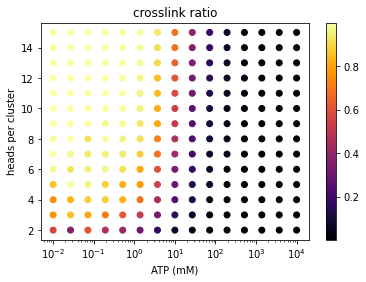

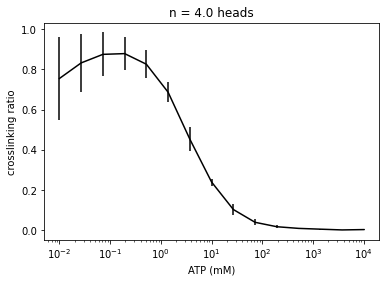

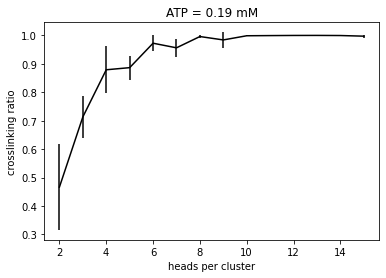

In [9]:
#xlking phase space
space1, space2 = np.meshgrid(atps,nhds)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),c = xlk.transpose().flatten(),cmap = 'inferno')
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP (mM)')
plt.ylabel('heads per cluster')
plt.title('crosslink ratio')
plt.show()

#single slice in ATP
plt.errorbar(atps,xlk[:,2],err[:,2], fmt = 'k')
plt.gca().set_xscale('log')
plt.xlabel('ATP (mM)')
plt.ylabel('crosslinking ratio')
plt.title('n = %s heads' %nhds[2])
plt.show()

#single slice in motor heads
plt.errorbar(nhds,xlk[3,:],err[3,:], fmt = 'k')
#plt.gca().set_xscale('log')
plt.xlabel('heads per cluster')
plt.ylabel('crosslinking ratio')
plt.title('ATP = %s mM' %np.around(atps[3],2))
plt.show()

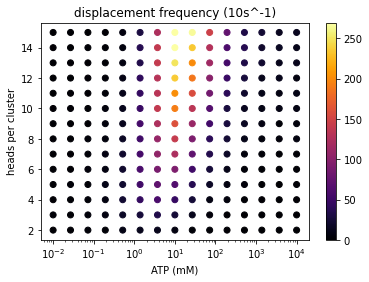

In [10]:
#displacement frequency phase space
space1, space2 = np.meshgrid(atps,nhds)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),c = av_disp.transpose().flatten(),cmap = 'inferno')#,\
            #norm=col.LogNorm(),)
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP (mM)')
plt.ylabel('heads per cluster')
plt.title('displacement frequency (10s^-1)')
plt.show()

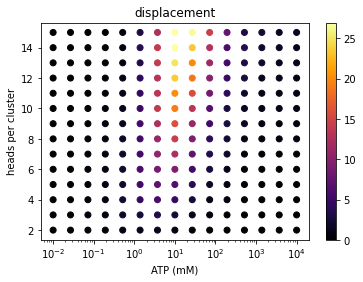

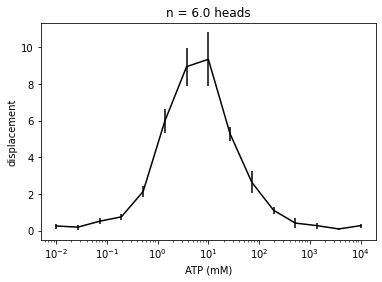

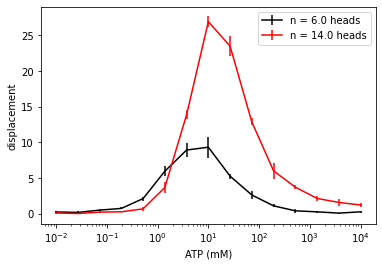

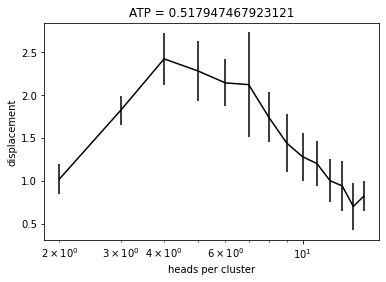

In [11]:
#displacement phase space
space1, space2 = np.meshgrid(atps,nhds)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),c = displacement.transpose().flatten(),cmap = 'inferno')#,\
            #norm=col.LogNorm(),)
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP (mM)')
plt.ylabel('heads per cluster')
plt.title('displacement')
plt.show()

#single slice in ATP
slc = 4
slc2 = 12
plt.errorbar(atps,displacement[:,slc],disp_err[:,slc], fmt = 'k')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP (mM)')
plt.ylabel('displacement')
plt.title('n = %s heads' %nhds[slc])
plt.show()

plt.errorbar(atps,displacement[:,slc],disp_err[:,slc], fmt = 'k', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps,displacement[:,slc2],disp_err[:,slc2], fmt = 'r', label = 'n = %s heads' %nhds[slc2])
plt.gca().set_xscale('log')
plt.xlabel('ATP (mM)')
plt.ylabel('displacement')
plt.legend()
#plt.title('n = %s heads' %nhds[2])
plt.show()

#single slice in cluster_size
slc = 4
plt.errorbar(nhds,displacement[slc,:],disp_err[slc,:], fmt = 'k')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('heads per cluster')
plt.ylabel('displacement')
plt.title('ATP = %s' %atps[slc])
plt.show()
